In [1]:
%matplotlib inline
import numpy as np
import sys, scipy
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

sys.path.append('./src')
import similarityMatrix as sMatr

In [2]:
img = sMatr.getCircleMatrix() #get matrix with two circle at (28, 24) and (67, 58) with redius 16 and 5
a = sMatr.getDiagMatrix() #just regular diagonal matrix
o1 = sMatr.getOffDiagMatrix(5) #diagonal matrix with thickness at that time point
o2 = sMatr.getOffDiagMatrixII(5) #diagonal matrix with thickness along all time points
o3 = sMatr.getOffDiagMatrixIII(3,5) #diagonal matrix with thickness along all time points, with number of breaks

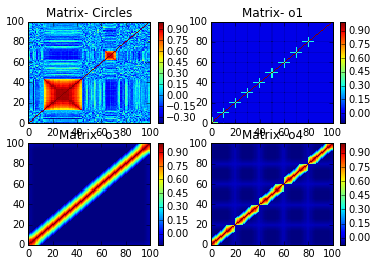

In [3]:
# plotting the correlation matrix
plt.subplot(2, 2, 1)
R = np.corrcoef(img)
plt.pcolor(R)
plt.colorbar()
plt.title('Matrix- Circles')

plt.subplot(2, 2, 2)
R = np.corrcoef(o1)
plt.pcolor(R)
plt.colorbar()
plt.title('Matrix- o1')

plt.subplot(2, 2, 3)
R = np.corrcoef(o2)
plt.pcolor(R)
plt.colorbar()
plt.title('Matrix- o3')

plt.subplot(2, 2, 4)
R = np.corrcoef(o3)
plt.pcolor(R)
plt.colorbar()
plt.title('Matrix- o4')

plt.show()

In [52]:

L, d = scipy.sparse.csgraph.laplacian(o3, normed=True, return_diag=True)
eigVals, eigVecs = np.linalg.eig(L)
print eigVals.shape, eigVecs.shape

j = 50
print eigVals[j]*eigVecs[:,j]
a = np.dot(L[:,:], eigVecs[:,j])
print a.shape, a



(100,) (100, 100)
[ -2.88269301e-02   3.84804073e-01  -8.19023234e-03  -4.25890792e-01
  -8.58043739e-02   9.45359174e-02   3.30753794e-01  -3.08388234e-01
   3.29373436e-01  -1.94856518e-01   7.70628428e-02  -5.87671777e-01
   5.07062944e-01   1.16775016e-01   2.14704722e-01  -5.32095193e-01
   1.12268852e-01   6.45240098e-02   1.32062525e-01  -3.53158120e-02
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.30265682e-15  -8.59008261e-16   7.14808215e-16  -1.04845834e-14
   1.32433578e-14  -5.63346907e-15   1.20835149e-14  -1.87046734e-14
   1.49237181e-14  -1.49049170e-14   1.32727402e-14  -1.53019604e-14
   1.87902374e-14  -1.12120865e-14   6.38743090e-15  -1.32086873e-14
   1.08831399e-1